# Part 3: Association Rules
This section will require that you create association rules that will allow you to identify relationships between variables in the dataset. You are provided with a separate dataset that comprises groups of items that will be associated with others. Just like in the other sections, you will also be required to provide insights for your analysis.

In [11]:
# loading the arules library
library(arules)

In [20]:
# loading & previewing data set
trans <- read.transactions("~/Downloads/Week 14/Supermarket 3.csv", format = "single", header = FALSE,
                          sep = ",", cols = c(2, 1))
head(trans)

transactions in sparse format with
 6 transactions (rows) and
 114 items (columns)

This output tells us that we have 6 transactins (rows) and 114 items (columns).

In [21]:
# verify object's class
class(trans)

[1] "transactions"
attr(,"package")
[1] "arules"

In [22]:
# inspecting the first 3 transactions
inspect(trans[1:3])

    items                     transactionID
[1] {avocado,                              
     burgers,                              
     chocolate,                            
     french fries,                         
     fresh tuna,                           
     frozen vegetables,                    
     ground beef,                          
     meatballs,                            
     milk,                                 
     mineral water,                        
     olive oil,                            
     shrimp,                               
     spaghetti,                            
     tomatoes}            almonds          
[2] {antioxydant juice,                    
     cereals,                              
     clothes accessories,                  
     cookies,                              
     escalope,                             
     grated cheese,                        
     mineral water,                        
     pickles,                   

In [23]:
# creating a data frame comprising of the individual items in the data set
items <- as.data.frame(itemLabels(trans))
colnames(items) <- "Item"
head(items, 10)

Item
almonds
antioxydant juice
asparagus
avocado
babies food
bacon
barbecue sauce
black tea
blueberries
body spray


In [24]:
# generating a summary of the transactions
summary(trans)

transactions as itemMatrix in sparse format with
 117 rows (elements/itemsets/transactions) and
 114 columns (items) and a density of 0.1511471 

most frequent items:
mineral water     spaghetti       burgers     chocolate          eggs 
           78            62            61            61            61 
      (Other) 
         1693 

element (itemset/transaction) length distribution:
sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25 26 27 
 4  3  6  5  6 11  5  4  1  3  5  5  3  3  3  1  1  5  4  1  1  5  2  1  3  1 
29 30 31 32 33 34 36 38 40 41 44 50 56 57 65 
 2  2  1  3  1  1  2  3  1  2  2  2  1  1  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.00   13.00   17.23   25.00   65.00 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

includes extended transaction information - examples:
      transactionID
1           almonds
2 antioxydant juice
3         a

From this, we see that the most frequently occuring item in the transactions is mineral water.

In [26]:
# exploring the frequencies of transactions 12 to 15
itemFrequency(trans[, 12:15],type = "absolute")
round(itemFrequency(trans[, 12:15],type = "relative")*100,2)

brownies    bug spray burger sauce      burgers 
          15            5            2           61

brownies    bug spray burger sauce      burgers 
       12.82         4.27         1.71        52.14

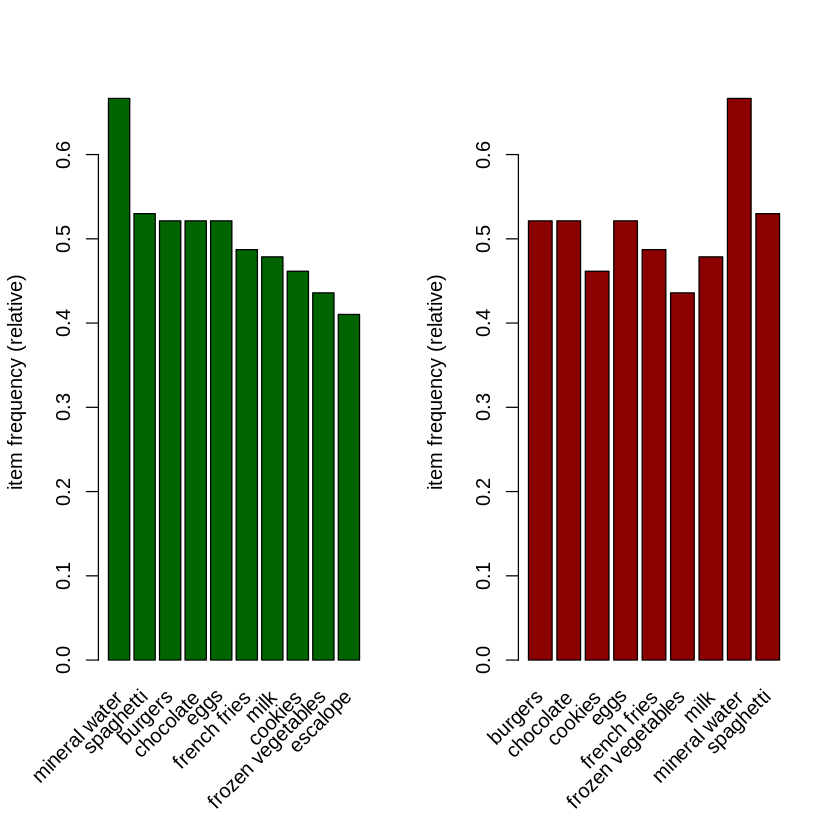

In [32]:
# plotting the top 10 most common items
par(mfrow = c(1, 2))

itemFrequencyPlot(trans, topN = 10, col="darkgreen")
itemFrequencyPlot(trans, support = 0.42, col="darkred")

In [ ]:
# building a model using apriori function and min support 0.001 and confidence 0.8
rules <- apriori(trans, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 117 transaction(s)] done [0.00s].
sorting and recoding items ... [114 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(trans, parameter = list(supp = 0.001, conf = 0.8)):
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”

In [1]:
# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (trans,parameter = list(supp = 0.002, conf = 0.8)) 
rules2

# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (trans, parameter = list(supp = 0.001, conf = 0.6)) 
rules3

ERROR: Error in apriori(trans, parameter = list(supp = 0.002, conf = 0.8)): could not find function "apriori"


In [ ]:
# previewing a summary of our rules
summary(rules)

In [ ]:
# inspecting the first 5 rules built by our model
inspect(rules[1:5])

In [ ]:
# sorting the rules in decreasing order of confidence
rules <- sort(rules, by = "confidence", decreasing = TRUE)
inspect(rules[1:5])